## Project Overview:
Develop a comprehensive credit scoring system to evaluate the creditworthiness of borrowers and segment customers into distinct risk categories.

### Objectives:

1. Collect and organize relevant borrower data, including payment history, credit utilization, credit history, and credit mix.
2. Design and implement complex algorithms and statistical models to generate accurate credit scores.
3. Segment customers into predefined credit tiers based on calculated credit scores.
4. Provide financial institutions with a reliable framework for assessing credit risk and making informed lending decisions.

### Scope:

1. Data collection and preprocessing.
2. Credit score calculation using advanced algorithms and statistical models.
3. Customer segmentation into distinct risk categories.
4. Development of a user-friendly interface for financial institutions to access and utilize credit scores and customer segments.

### Deliverables:

1. A comprehensive credit scoring system.
2. A customer segmentation framework.
3. A user-friendly interface for financial institutions.
4. A detailed report outlining the methodology, results, and recommendations.

### Key Stakeholders:
1. Financial institutions
2. Borrowers
3. Credit reporting agencies

### Success Metrics:
1. Accuracy of credit scores
2. Effectiveness of customer segmentation
3. Adoption rate by financial institutions
4. Improvement in lending decisions and risk management practices

In [13]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

In [14]:
customer_info = pd.read_csv("data/Customer_Credit_data.csv")

In [15]:
# Use the head() function to display the first five rows of the data
customer_info.head()

,Age,Gender,Marital Status,Educational Qualification,Employment Type,Credit Usage Ratio,Payment Record,Total Credit Accounts,Loan Amount,Interest Rate,Loan Tenure,Loan Category
0,24,Male,Divorced,High School,Unemployed,0.37,1729,10,109000,10.29,25,Auto Loan
1,60,Female,Divorced,Bachelor,Self-Employed,0.68,2586,2,110000,5.07,13,Personal Loan
2,59,Female,Divorced,Master,Unemployed,0.47,357,4,119000,7.50,37,Home Loan
3,27,Female,Divorced,Master,Employed,0.31,586,8,128000,19.13,37,Home Loan
4,28,Male,Divorced,High School,Self-Employed,0.41,1900,2,135000,6.92,13,Home Loan


## Dataset Description:

### Customer Personal Information:
1. Age
2. Gender
3. Marital Status
4. Education Level
5. Employment Status

### Credit and Loan Details:
1. Credit Usage Ratio : The ratio of credit used to total available credit.
2. Payment Record : The individual's monthly payment behavior.
3. Total Credit Accounts :  The number of active credit accounts.
4. Loan Amount : The total amount of the loan.
5. Interest Rate : The interest rate associated with the loan.
6. Loan Tenure : The duration or term of the loan.
7. Loan Category : The type of loan (e.g., personal, auto).

In [16]:
# Examining Dataset Properties: Data Types, Size, and Missing Values
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Educational Qualification  1000 non-null   object 
 4   Employment Type            1000 non-null   object 
 5   Credit Usage Ratio         1000 non-null   float64
 6   Payment Record             1000 non-null   int64  
 7   Total Credit Accounts      1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Tenure                1000 non-null   int64  
 11  Loan Category              1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [17]:
# Let's review the summary statistics of the data
customer_info.describe()

,Age,Credit Usage Ratio,Payment Record,Total Credit Accounts,Loan Amount,Interest Rate,Loan Tenure
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.529110,1467.814000,5.580000,2.472401e+06,10.696600,38.128000
std,13.266771,0.289707,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.020000,15.000000,1.000000,1.090000e+05,1.020000,13.000000
25%,31.000000,0.270000,778.750000,3.000000,1.299000e+06,6.032500,25.000000
50%,42.000000,0.550000,1443.000000,6.000000,2.438500e+06,10.715000,37.000000
75%,54.000000,0.770000,2157.000000,8.000000,3.654250e+06,15.450000,49.000000
max,65.000000,0.990000,2872.000000,10.000000,4.997000e+06,20.000000,61.000000


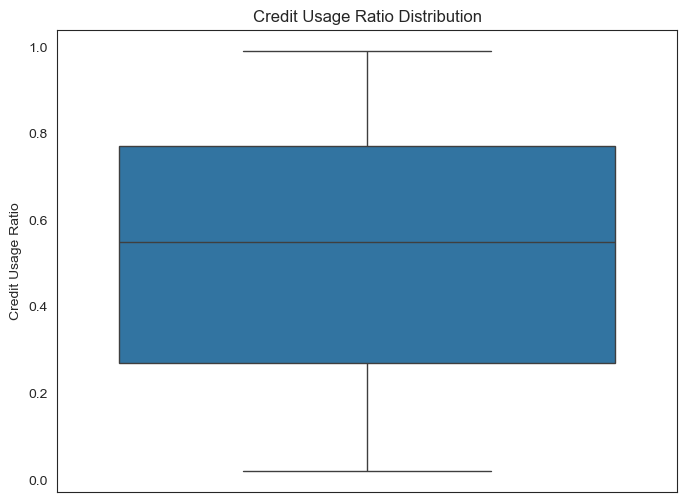

In [18]:
#  distribution of the credit Usage ratio in the data

plt.figure(figsize=(8,6))
sns.boxplot(data=customer_info, y='Credit Usage Ratio')
plt.title('Credit Usage Ratio Distribution')
plt.show()

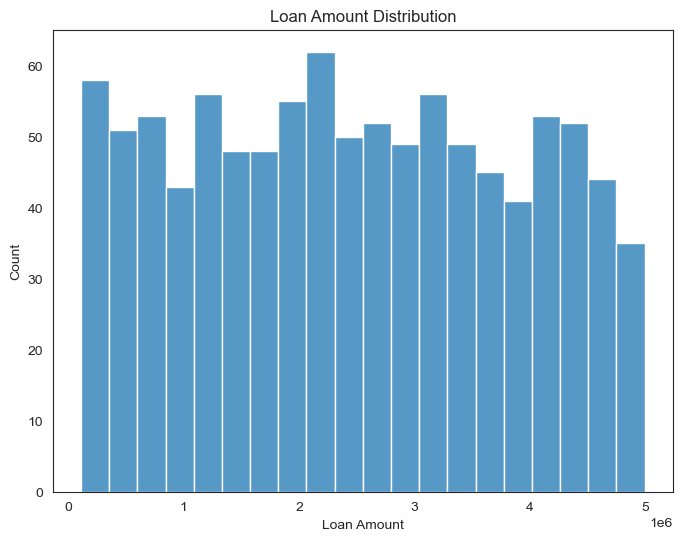

In [19]:
# distribution of the loan amount in the data
plt.figure(figsize=(8,6))
sns.histplot(data=customer_info, x='Loan Amount', bins=20, kde=False)
plt.title('Loan Amount Distribution')
plt.show()

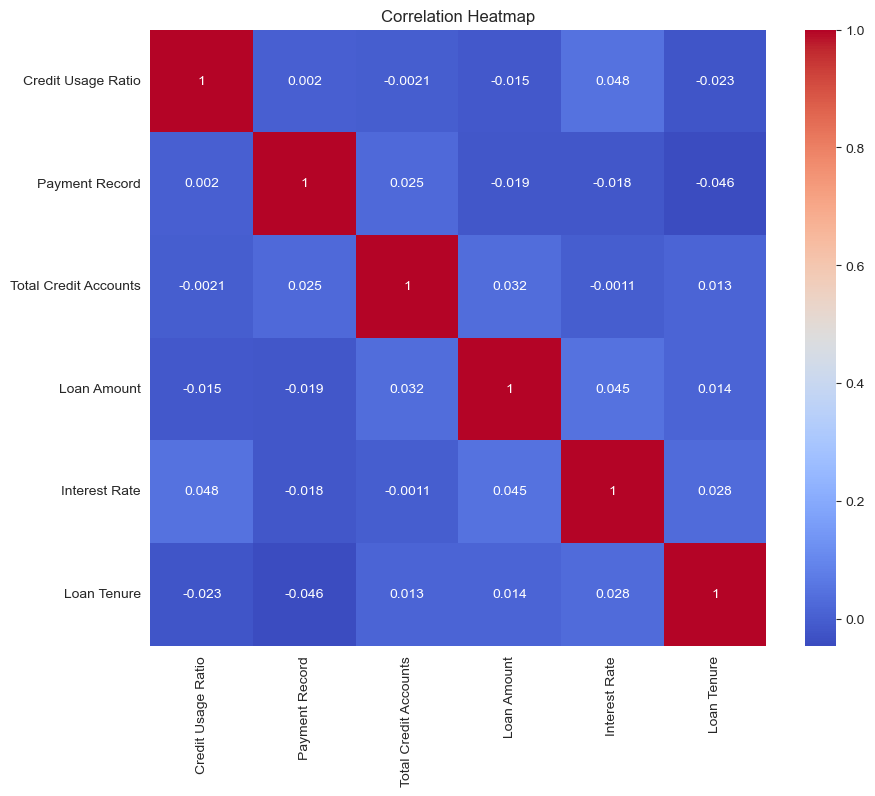

In [20]:
numeric_df = customer_info[['Credit Usage Ratio','Payment Record', 'Total Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Tenure']]
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Since the dataset lacks a feature for credit scores, we'll need to employ a suitable method to calculate FICO Scores

In [21]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
customer_info['Educational Qualification'] = customer_info['Educational Qualification'].map(education_level_mapping)
customer_info['Employment Type'] = customer_info['Employment Type'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in customer_info.iterrows():
    Payment_Record = row['Payment Record']
    Credit_Usage_Ratio = row['Credit Usage Ratio']
    Total_Credit_Accounts = row['Total Credit Accounts']
    Educational_Qualification = row['Educational Qualification']
    Employment_Type = row['Employment Type']

    # Apply the FICO formula to calculate the credit score
    credit_score = (Payment_Record * 0.35) + (Credit_Usage_Ratio * 0.30) + (Total_Credit_Accounts * 0.15) + (Educational_Qualification * 0.10) + (Employment_Type * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
customer_info['Credit Score'] = credit_scores

customer_info.head()

,Age,Gender,Marital Status,Educational Qualification,Employment Type,Credit Usage Ratio,Payment Record,Total Credit Accounts,Loan Amount,Interest Rate,Loan Tenure,Loan Category,Credit Score
0,24,Male,Divorced,1,0,0.37,1729,10,109000,10.29,25,Auto Loan,606.861
1,60,Female,Divorced,2,2,0.68,2586,2,110000,5.07,13,Personal Loan,906.004
2,59,Female,Divorced,3,0,0.47,357,4,119000,7.50,37,Home Loan,125.991
3,27,Female,Divorced,3,1,0.31,586,8,128000,19.13,37,Home Loan,206.793
4,28,Male,Divorced,1,2,0.41,1900,2,135000,6.92,13,Home Loan,665.723


### Segmentation Based on Credit Scores

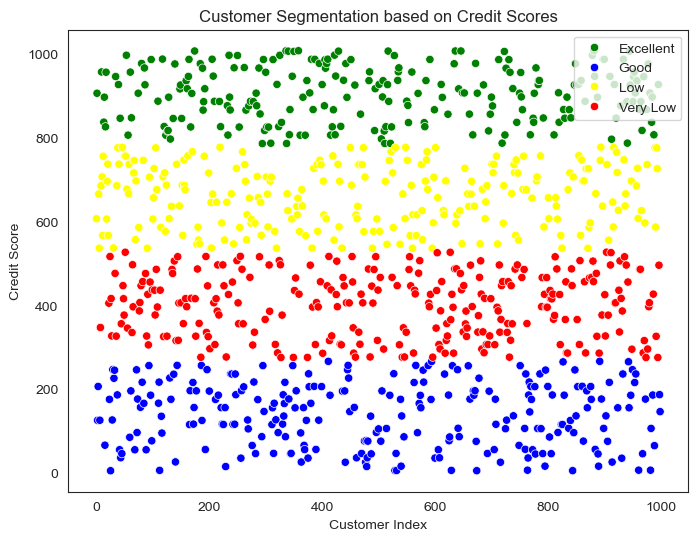

In [28]:
 # using the KMeans clustering algorithm to segment customers based on their credit scores

from sklearn.cluster import KMeans

X = customer_info[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
customer_info['Segment'] = kmeans.labels_

# naming the segments based on the clusters
customer_info['Segment'] = customer_info['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})
# Convert the 'Segment' column to category data type
customer_info['Segment'] = customer_info['Segment'].astype('category')

plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_info, x=customer_info.index, y='Credit Score', hue='Segment', palette=['green', 'blue', 'yellow', 'red'])
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.legend(loc='upper right')
plt.title('Customer Segmentation based on Credit Scores')
plt.show()

## Recommendations:

#### 1. Adopt the Credit Scoring System for Decision-Making:
Financial institutions should integrate the developed credit scoring system into their lending processes to assess borrower creditworthiness accurately and efficiently.

#### 2. Tailor Loan Products to Customer Segments:
Use the customer segmentation framework to design risk-adjusted loan products, such as offering lower interest rates to low-risk customers and tailored repayment plans to medium-risk customers.

#### 3. Enhance Data Collection Processes:
Encourage borrowers to provide comprehensive and updated financial data, which can improve the system's accuracy and ensure its continued reliability.

#### 4. Monitor and Update the Model Regularly:
Establish a periodic review process to retrain the credit scoring and segmentation models with fresh data, ensuring they stay accurate as market conditions and borrower behaviors evolve.

#### 5. Expand the System's Scope:
Incorporate additional variables, such as macroeconomic indicators or alternative data (e.g., utility payments or rental history), to enhance predictive power and include underserved populations.

#### 6. Educate Stakeholders on Model Usage:
Conduct training sessions for financial institutions to ensure stakeholders understand how to interpret credit scores and segmentation outputs effectively.

#### 7. Implement Robust Risk Management Practices:
Use the segmentation insights to design proactive measures, such as early interventions for medium-risk customers to prevent them from becoming high-risk.

#### 8. Evaluate System Performance Metrics:
Regularly measure the system's performance against success metrics like default rates, accuracy, and adoption rates, and make iterative improvements based on these evaluations.